# Week 1: Exploratory Data Analysis (EDA) - Heart Failure Survival

## Learning Objectives
1. Load and explore a clinical dataset using pandas
2. Understand the features and their meanings
3. Create visualizations to explore patterns
4. Identify important features

---

## 1. Dataset Loading
**299 heart failure patients** from Pakistan (2015). We want to predict survival based on clinical features.

**Reference:** Chicco & Jurman (2020), BMC Medical Informatics

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
print("Libraries loaded!")

Libraries loaded!


Importing the data

In [5]:
#importing the data
import pandas as pd
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
print(f"Dataset Shape: {df.shape[0]} patients, {df.shape[1]} features")
df.head(10)

Dataset Shape: 299 patients, 13 features


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## 2. Feature Descriptions

| Feature | Type | Description |
|---------|------|-------------|
| age | Continuous | Patient's age (years) |
| anaemia | Binary | Low red blood cells (0=No, 1=Yes) |
| creatinine_phosphokinase | Continuous | CPK enzyme level (mcg/L) - heart damage indicator |
| diabetes | Binary | Has diabetes (0=No, 1=Yes) |
| ejection_fraction | Continuous | % of blood pumped per heartbeat (normal: 55-70%) |
| high_blood_pressure | Binary | Has hypertension (0=No, 1=Yes) |
| platelets | Continuous | Platelet count in blood |
| serum_creatinine | Continuous | Creatinine level - kidney function (mg/dL) |
| serum_sodium | Continuous | Sodium level (mEq/L) |
| sex | Binary | 0=Female, 1=Male |
| smoking | Binary | Smokes (0=No, 1=Yes) |
| time | Continuous | Follow-up period (days) |
| **DEATH_EVENT** | Binary | **Target: 0=Survived, 1=Died** |

## 3. Summary Statistics

In [8]:
# Overall statistics
df.describe().round(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [9]:
# Compare mean values by outcome (Survived vs Died)
print("Mean values by outcome:")
df.groupby('DEATH_EVENT').mean().round(2).T

Mean values by outcome:


DEATH_EVENT,0,1
age,58.76,65.22
anaemia,0.41,0.48
creatinine_phosphokinase,540.05,670.20
diabetes,0.42,0.42
ejection_fraction,40.27,33.47
high_blood_pressure,0.33,0.41
platelets,266657.49,256381.04
serum_creatinine,1.18,1.84
serum_sodium,137.22,135.38
sex,0.65,0.65


In [12]:
#generate the xblock and yblock
df_features = df.iloc[:,:-1]
df_target = df['DEATH_EVENT']

In [13]:
# Calculate the summary statistics
summary = pd.DataFrame({
    'Mean': df_features.mean(),
    'Median': df_features.median(),
    'Min': df_features.min(),
    'Max': df_features.max(),
    'Range': df_features.max() - df_features.min(),
    'Missing Values': df_features.isnull().sum()
})

summary.reset_index(inplace=True)
summary.rename(columns={'index': 'Column'}, inplace=True)

#summary.to_csv('/Users/bonakdar/Desktop/sec2_1.csv')
summary

,Column,Mean,Median,Min,Max,Range,Missing Values
0,age,60.833893,60.0,40.0,95.0,55.0,0
1,anaemia,0.431438,0.0,0.0,1.0,1.0,0
2,creatinine_phosphokinase,581.839465,250.0,23.0,7861.0,7838.0,0
3,diabetes,0.418060,0.0,0.0,1.0,1.0,0
4,ejection_fraction,38.083612,38.0,14.0,80.0,66.0,0
5,high_blood_pressure,0.351171,0.0,0.0,1.0,1.0,0
6,platelets,263358.029264,262000.0,25100.0,850000.0,824900.0,0
7,serum_creatinine,1.393880,1.1,0.5,9.4,8.9,0
8,serum_sodium,136.625418,137.0,113.0,148.0,35.0,0
9,sex,0.648829,1.0,0.0,1.0,1.0,0


In [18]:
# Target distribution
print("Death Event Distribution:")
print(df['DEATH_EVENT'].value_counts())
print(f"\nSurvival Rate: {(df['DEATH_EVENT'] == 0).mean() * 100:.1f}%")
print(f"Mortality Rate: {(df['DEATH_EVENT'] == 1).mean() * 100:.1f}%")

Death Event Distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Survival Rate: 67.9%
Mortality Rate: 32.1%


In [23]:
# Binary features
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Mortality rate by each binary feature
print("Mortality Rate by Binary Features:")
print("=" * 40)

for col in binary_cols:
    print(f"\n{col.upper()}:")
    for val in [0, 1]:
        subset = df[df[col] == val]
        rate = (subset['DEATH_EVENT'] == 1).mean() * 100
        label = 'Yes' if val == 1 else 'No'
        if col == 'sex':
            label = 'Male' if val == 1 else 'Female'
        print(f"  {label}: {rate:.1f}% ({len(subset)} patients)")

Mortality Rate by Binary Features:

ANAEMIA:
  No: 29.4% (170 patients)
  Yes: 35.7% (129 patients)

DIABETES:
  No: 32.2% (174 patients)
  Yes: 32.0% (125 patients)

HIGH_BLOOD_PRESSURE:
  No: 29.4% (194 patients)
  Yes: 37.1% (105 patients)

SEX:
  Female: 32.4% (105 patients)
  Male: 32.0% (194 patients)

SMOKING:
  No: 32.5% (203 patients)
  Yes: 31.2% (96 patients)


## 4. Data Visualization

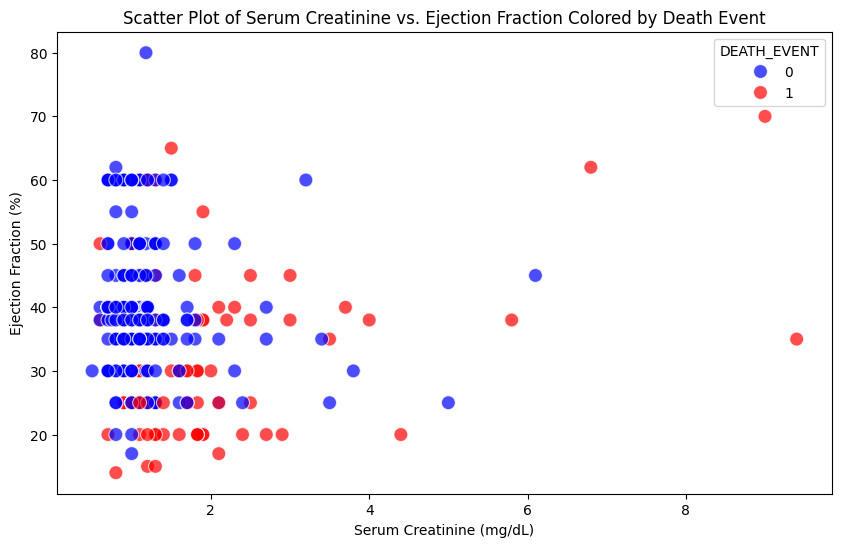

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom colors for the hue levels
hue_order = [0, 1]
palette = {0: 'blue', 1: 'red'}

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='serum_creatinine', y='ejection_fraction', hue='DEATH_EVENT', palette=palette, hue_order=hue_order, s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Ejection Fraction (%)')
plt.title('Scatter Plot of Serum Creatinine vs. Ejection Fraction Colored by Death Event')

# Display the plot
plt.show()

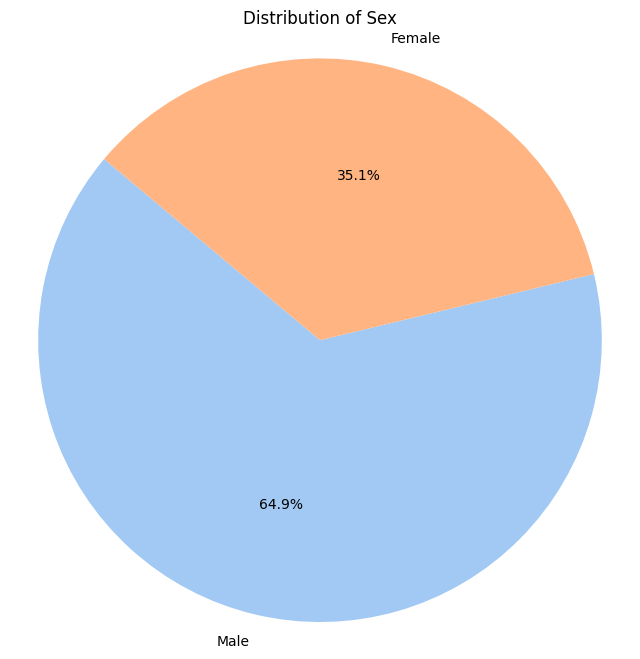

In [ ]:
# Count the occurrences of each sex value
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'Count']
sex_counts['sex'] = sex_counts['sex'].map({0: 'Female', 1: 'Male'})

sex_counts
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts['Count'], labels=sex_counts['sex'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

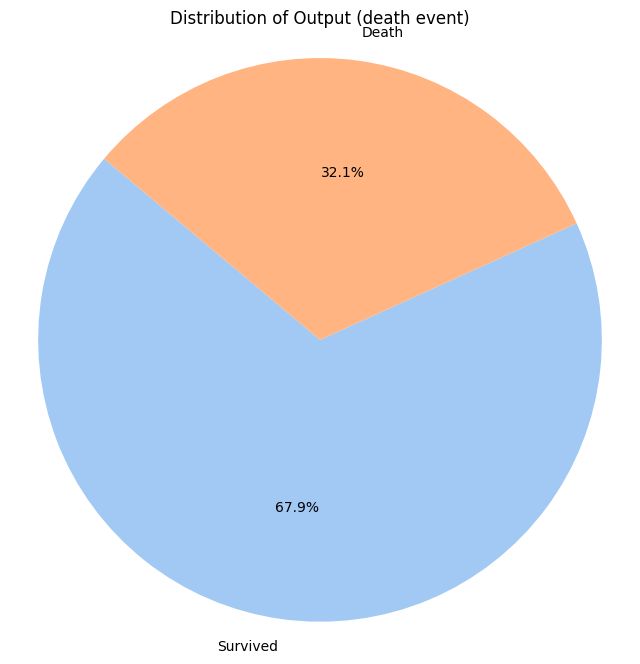

In [ ]:
# Count the occurrences of each output
output_counts = df_target.value_counts().reset_index()
output_counts.columns = ['DEATH_EVENT', 'Count']
output_counts['DEATH_EVENT'] = output_counts['DEATH_EVENT'].map({0: 'Survived', 1: 'Death'})

# Plot a pie chart for output
plt.figure(figsize=(8, 8))
plt.pie(output_counts['Count'], labels=output_counts['DEATH_EVENT'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Distribution of Output (death event)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

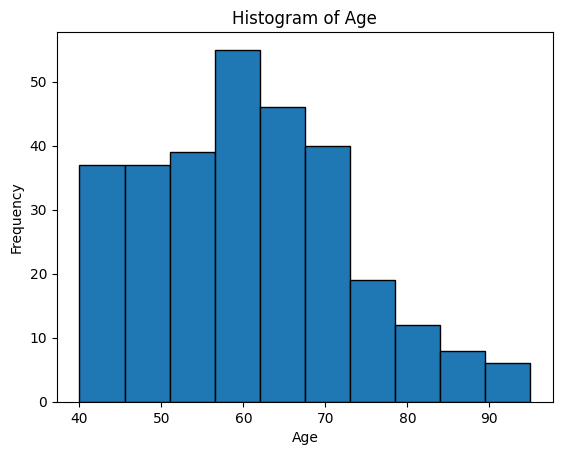

In [ ]:
# get the histogram of AGE for each age interval
plt.hist(df_features['age'], bins="auto", edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Creatinine Phosphokinase')

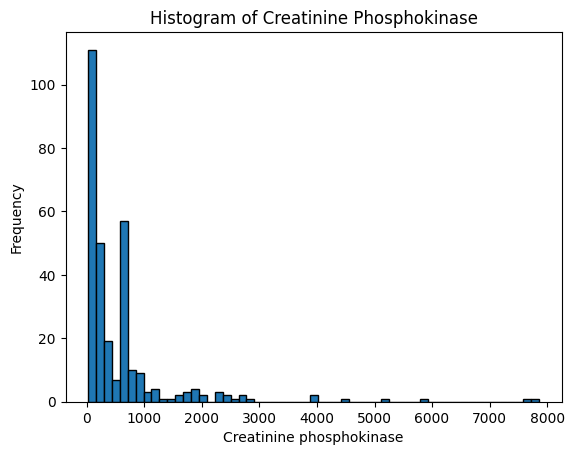

In [ ]:
# get the histogram of creatinine phosphokinase for each interval
plt.hist(df_features['creatinine_phosphokinase'], bins="auto", edgecolor='black')
plt.xlabel("Creatinine phosphokinase")
plt.ylabel("Frequency")
plt.title('Histogram of Creatinine Phosphokinase')

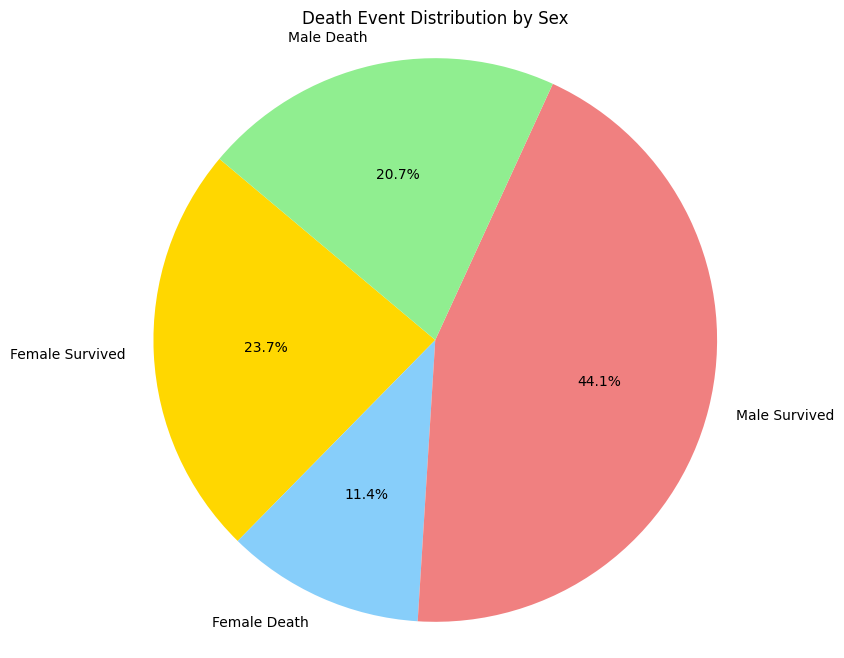

In [ ]:
#PIE CHART of output according to sex

grouped = df.groupby(['sex', 'DEATH_EVENT']).size().unstack(fill_value=0)

plot_data = []
labels = []
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']

for sex, sex_label in zip([0, 1], ['Female', 'Male']):
    for event, event_label in zip([0, 1], ['Survived', 'Death']):
        plot_data.append(grouped.loc[sex, event])
        labels.append(f"{sex_label} {event_label}")


plt.figure(figsize=(8, 8))
plt.pie(plot_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Death Event Distribution by Sex')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
grouped

DEATH_EVENT,0,1
sex,,
0,71,34
1,132,62


Text(0.5, 1.0, '')

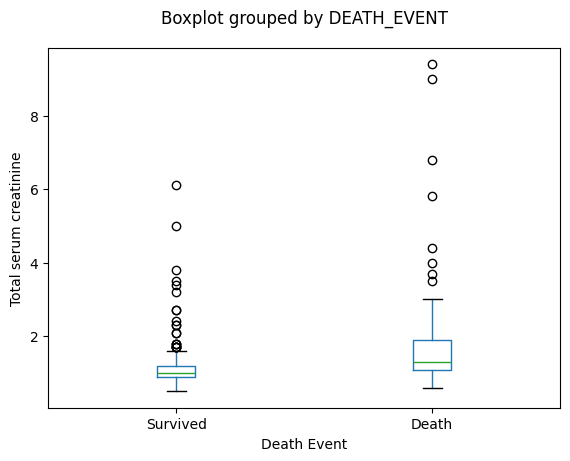

In [ ]:
# DEATH_EVENT and serum creatinine
# boxplot group by DEATH event
pd.concat([df.serum_creatinine,df.DEATH_EVENT], axis=1).dropna().boxplot(by="DEATH_EVENT",grid=False)
plt.xlabel('Death Event')
plt.ylabel('Total serum creatinine')
plt.xticks([1, 2], ["Survived", "Death"])
plt.title("")

Text(0, 0.5, 'serum_sodium')

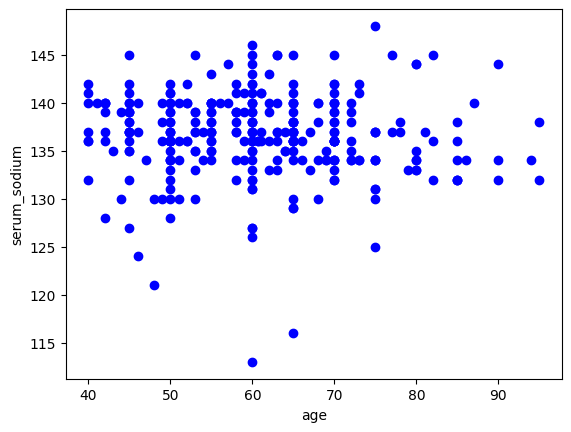

In [ ]:
# plot the scatter by age and serum_sodium
plt.scatter(df.age,df.serum_sodium, edgecolors="b", c="blue")
plt.xlabel('age')
plt.ylabel('serum_sodium')

Text(0.5, 1.0, '')

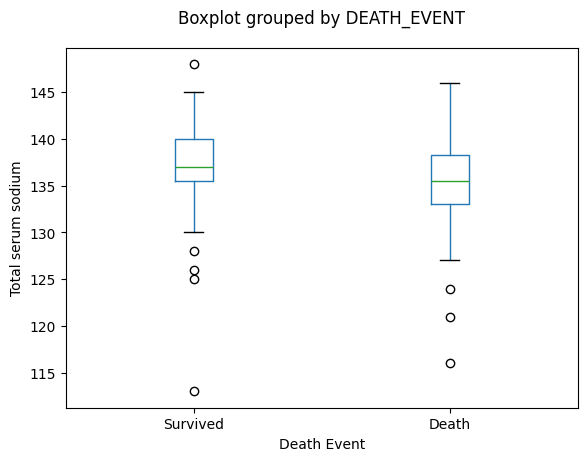

In [ ]:
# DEATH_EVENT and serum sodium
# boxplot group by DEATH event
pd.concat([df.serum_sodium,df.DEATH_EVENT], axis=1).dropna().boxplot(by="DEATH_EVENT",grid=False)
plt.xlabel('Death Event')
plt.ylabel('Total serum sodium')
plt.xticks([1, 2], ["Survived", "Death"])
plt.title("")

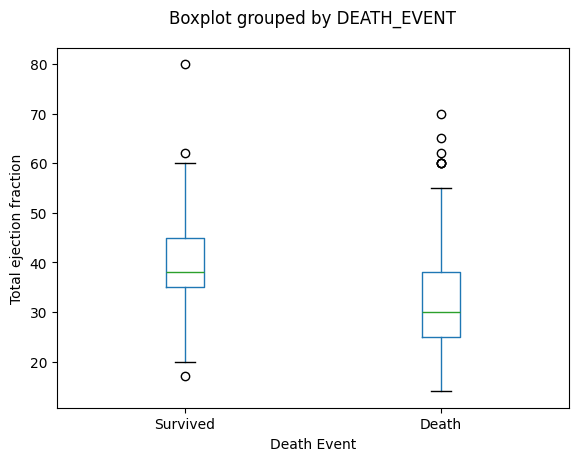

In [ ]:
# DEATH_EVENT and ejection fraction
# boxplot group by DEATH event
pd.concat([df.ejection_fraction,df.DEATH_EVENT], axis=1).dropna().boxplot(by="DEATH_EVENT",grid=False)
plt.xlabel('Death Event')
plt.ylabel('Total ejection fraction')
plt.xticks([1, 2], ["Survived", "Death"])
plt.title("");

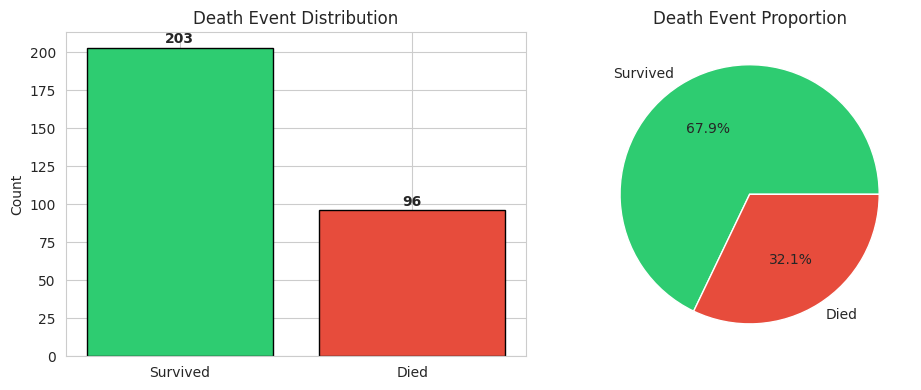

In [19]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

colors = ['#2ecc71', '#e74c3c']
labels = ['Survived', 'Died']

# Bar chart
counts = df['DEATH_EVENT'].value_counts().sort_index()
axes[0].bar(labels, counts.values, color=colors, edgecolor='black')
axes[0].set_ylabel('Count')
axes[0].set_title('Death Event Distribution')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Death Event Proportion')

plt.tight_layout()
plt.show()

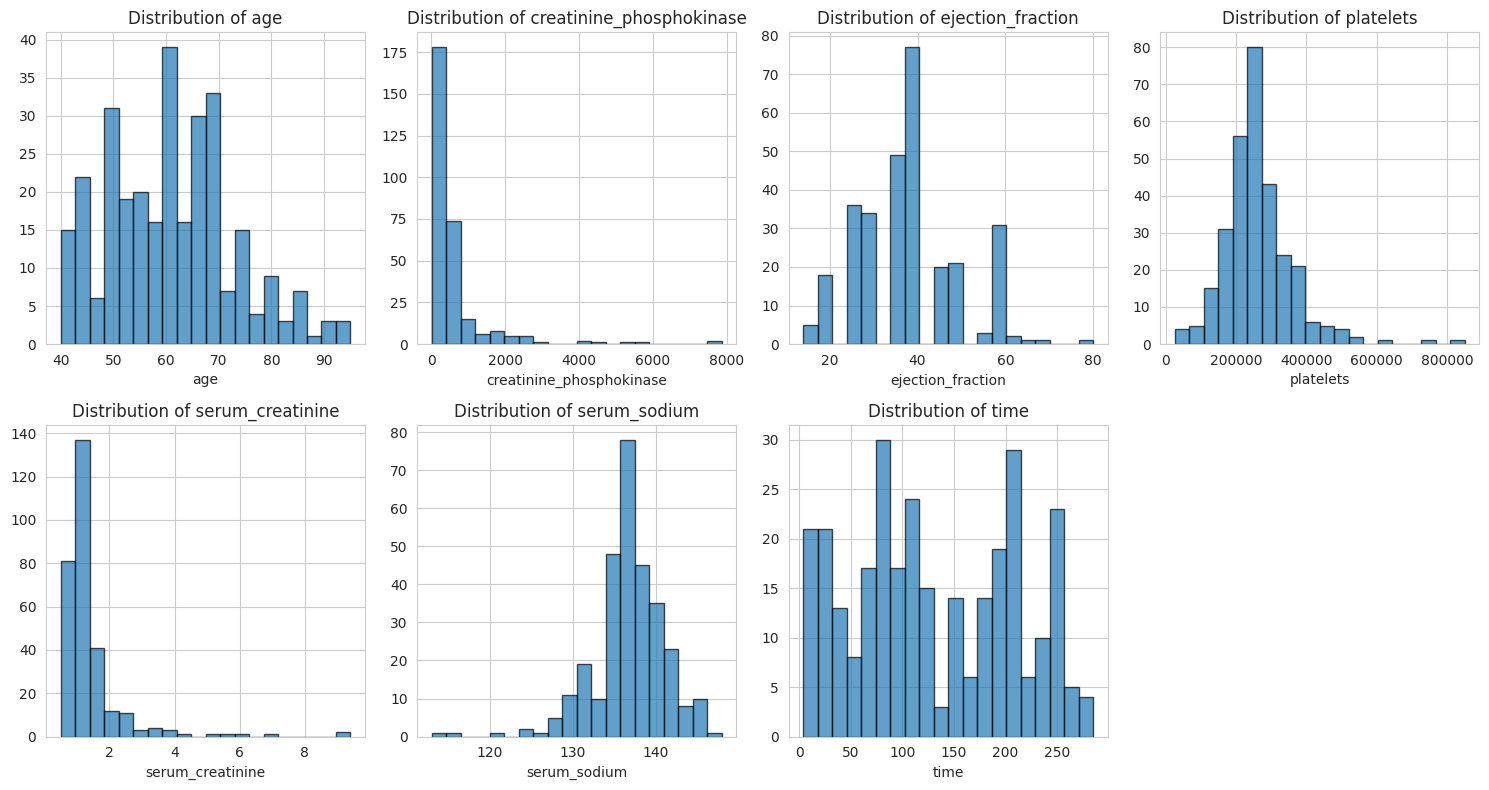

In [20]:
# Distribution of continuous features
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                   'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Distribution of {col}')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

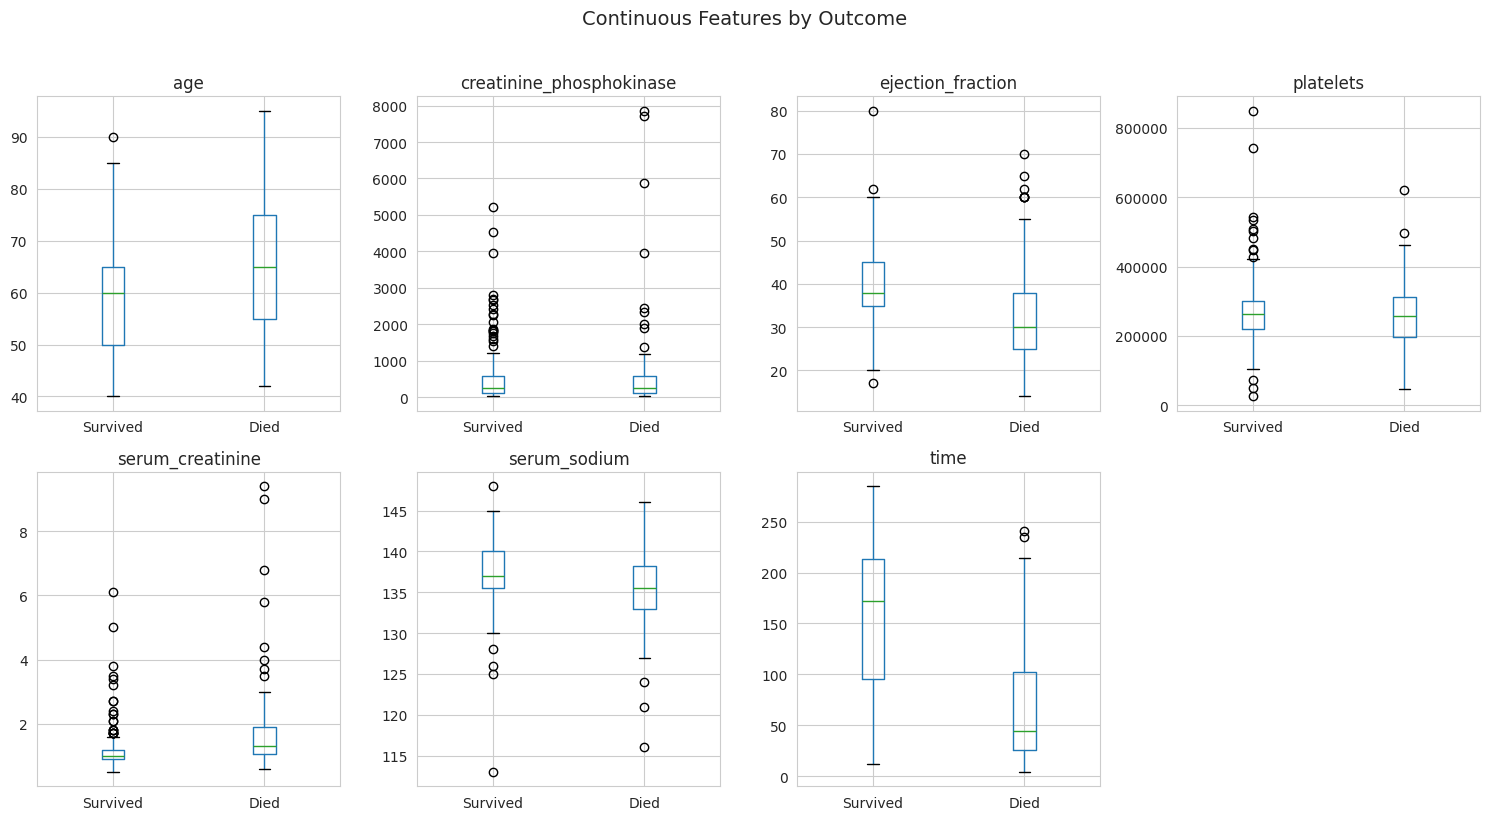

In [21]:
# Box plots: Compare features by outcome
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    df.boxplot(column=col, by='DEATH_EVENT', ax=axes[i])
    axes[i].set_xticklabels(['Survived', 'Died'])
    axes[i].set_xlabel('')
    axes[i].set_title(col)

axes[-1].set_visible(False)
plt.suptitle('Continuous Features by Outcome', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

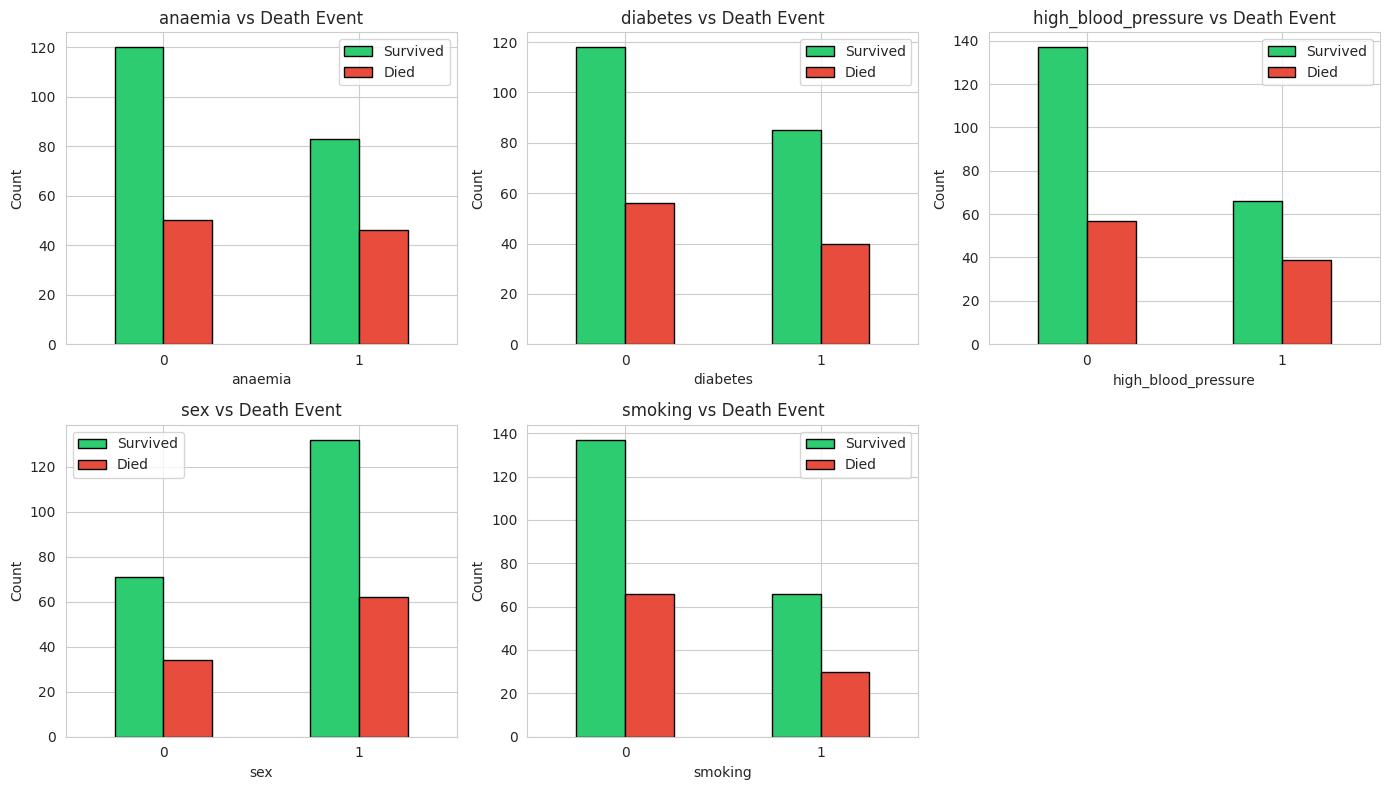

In [26]:
# Visualize binary features vs outcome
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

colors = ['#2ecc71', '#e74c3c']

for i, col in enumerate(binary_cols):
    ct = pd.crosstab(df[col], df['DEATH_EVENT'])
    ct.plot(kind='bar', ax=axes[i], color=colors, edgecolor='black')
    axes[i].set_title(f'{col} vs Death Event')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(['Survived', 'Died'])
    axes[i].tick_params(axis='x', rotation=0)

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

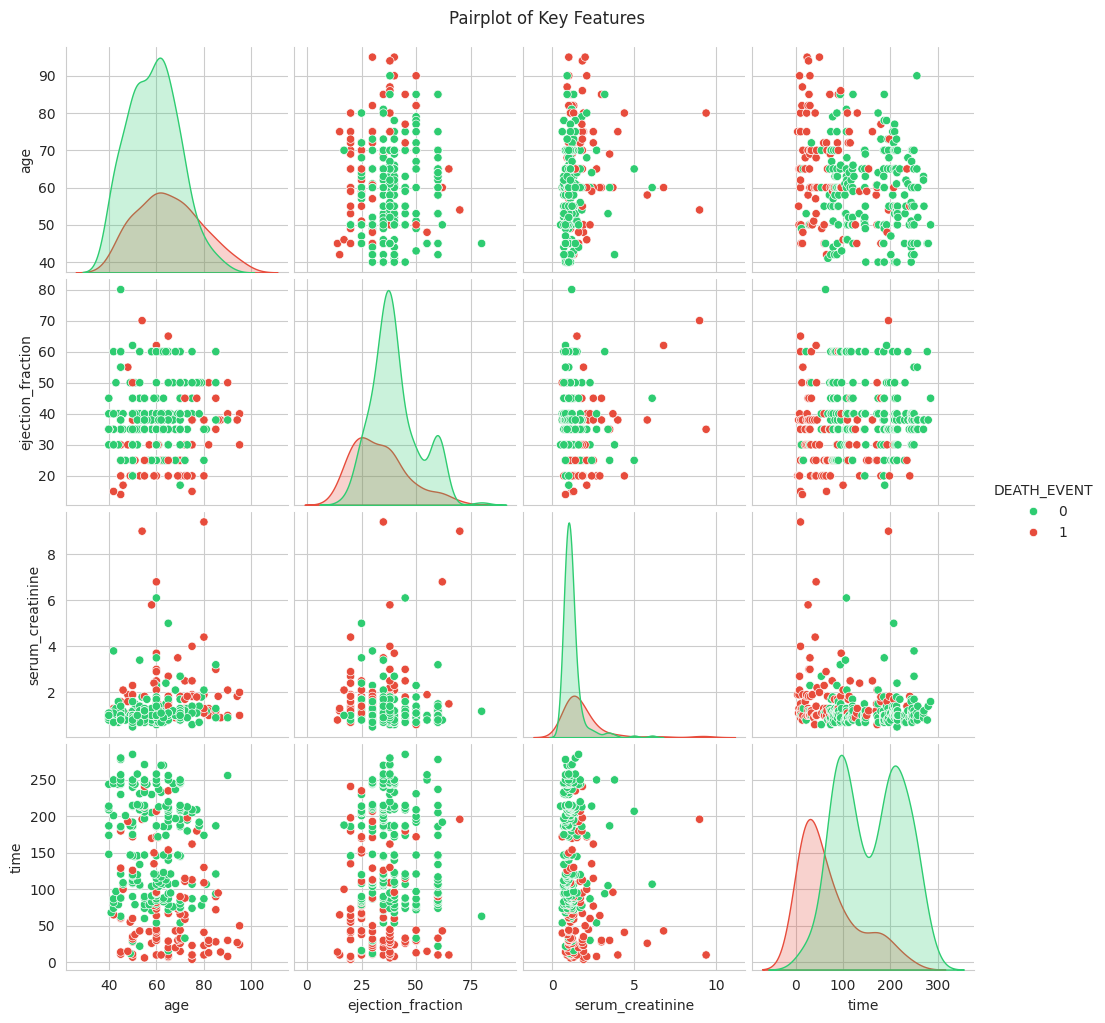

In [28]:
# Pairplot of key features
key_features = ['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']
sns.pairplot(df[key_features], hue='DEATH_EVENT', palette={0: '#2ecc71', 1: '#e74c3c'})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 5. Key Findings

### Dataset Overview
- **299 patients** with heart failure
- **32% mortality rate** (96 deaths, 203 survivors)
- No missing values - clean dataset
- 65% male patients
- Relationship between features and also features with the output

---

## 6. Resources

### Dataset & Paper
- **Original Paper**: [Chicco & Jurman (2020) - BMC Medical Informatics](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)
- **Dataset**: [Kaggle - Heart Failure Clinical Data](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

### Python & Statistics (Video Tutorials)
- **StatQuest** (Highly Recommended): https://www.youtube.com/c/joshstarmer
  - Covers t-tests, correlation, chi-square, and ML fundamentals
- **Corey Schafer - Pandas**: https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS

### Documentation
- **Pandas**: https://pandas.pydata.org/docs/user_guide/10min.html
- **Seaborn**: https://seaborn.pydata.org/tutorial.html
- **Scikit-Learn**: https://scikit-learn.org/stable/tutorial/index.html

### Free Books
- **Python Data Science Handbook**: https://jakevdp.github.io/PythonDataScienceHandbook/
- **Introduction to Statistical Learning**: https://www.statlearning.com/

### Clinical Background
- **Heart Failure Overview**: https://www.heart.org/en/health-topics/heart-failure
- **Ejection Fraction Explained**: https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement

---

### Questions to Think About
1. Why might binary features (diabetes, smoking) not be significant predictors?
2. Should the "time" variable be included in a prediction model? Why or why not?
3. How would you handle the class imbalance (32% mortality vs 68% survival)?